Exercise 1

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
# for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for KNN classifier and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

The accompanying file contains 111 observations with the binary target variable y along with the predictor variables x1, x2, x3, and x4.

In [5]:
# load data (remember to upload the datafile you downloaded from connect to colab)
projdata=pd.read_excel('/Users/kabu/Downloads/Q1_Data_File.xlsx')
projdata.head(10)

,y,x1,x2,x3,x4
0,1,74900,86,98,29886
1,1,60600,84,95,34603
2,1,52900,65,90,28107
3,0,44000,65,95,23583
4,1,54500,68,92,34086
5,1,45200,61,83,19156
6,1,40400,62,89,31564
7,1,51800,74,87,33821
8,1,44100,80,94,23415
9,0,38600,56,88,22644


Partition data sets into 70% training and 30% testing. Use the argument random_state = 8 to specify the random seed of 8 for data partitioning. Don`t forget to scale your data using standardization.

In [6]:
# split into training and testing data

#predictors 
X=projdata.drop('y', axis=1)
y=projdata['y']

#train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=8, stratify=y )

In [7]:
# standardizer
standardizer = StandardScaler(). fit(X_train)
standardizer

#apply
X_trainS= pd.DataFrame(standardizer. transform(X_train), columns=X_train.columns)
X_testS= pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)

Perform KNN analysis on the data set. What is the optimal value of k. (based on testing accuracy, look for the optimal k-value between 1 and 15) FIns the optimal k

In [8]:
# Conduct KNN to find accuracy values for all Ks between 1 -15. (as in tutorial video)
 
kvalues=np.arange(1,15)
accuracy_train=np.empty(len(kvalues))
accuracy_test=np.empty(len(kvalues))

#iterate
for i, k in enumerate(kvalues):

    #create model
    knn=KNeighborsClassifier(n_neighbors=k)

    #fit classifier to training data 
    knn.fit(X_trainS, y_train)

    #accuracy comparison 
    accuracy_train[i]=knn.score(X_trainS, y_train)

    #compute accuracy for test data 
    accuracy_test[i]=knn.score(X_testS, y_test)



<Axes: >

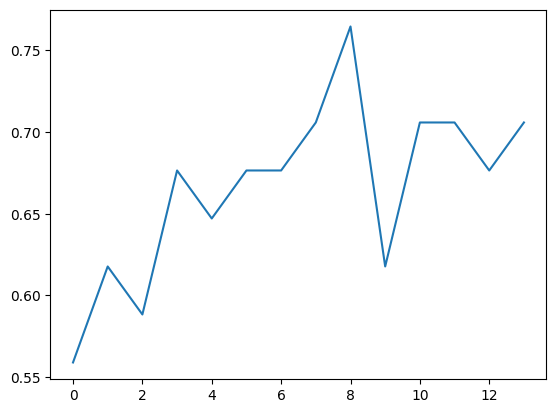

In [9]:
# Create an accuracy table to check which K is the best on the testing set
sns.lineplot(data=accuracy_test)

b-1. Using the optimal k-value, report the accuracy, specificity, sensitivity, and precision rates for the test data set. (Round your answers to 2 decimal places.) Please note that the confusion_matrix function has the 0 and 1 values the other way around compared to our textbook.

In [10]:
# Create predictions using the highest accuracy k-value

knn=KNeighborsClassifier(n_neighbors=9)

#fit into training data
knn.fit(X_trainS, y_train)

#get scores
knn.score(X_testS, y_test)




0.7647058823529411

In [11]:
# Create confusion matrix with actual test values and predictions

#get predictions
predictions=knn.predict(X_testS)

confusion_matrix(y_test, predictions)
confusion=confusion_matrix(y_test, predictions)
confusion

array([[12,  5],
       [ 3, 14]])

In [13]:
# Calcaulate Confusion Metrics
TN= confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

#Misclassification (error rate)
ErrorRate= (FP + FN) / (TP+TN+FP+FN)
print("Error rate is", np.round(ErrorRate, 2))

#Accuracy 
Accuracy= (TP+TN) / (TP+TN+FP+FN)
print("Accuracy is", np.round(Accuracy, 2))

#True Positive, Sensitivity
Sensitivity= (TP)/ (TP + FN)
print("Sensitivity is", round(Sensitivity, 2))

#Precision
Precision= (TP) / (TP+FP)
print("Precision is", np.round(Precision, 2))

#Specificity 
Specificity= (TN)/(TN+FP)
print("Specificity is", np.round(Specificity, 2))

#False Positive
FalsePositive= (FP) / (TN+FP)
print("False positive is", round(FalsePositive, 2))


Error rate is 0.24
Accuracy is 0.76
Sensitivity is 0.82
Precision is 0.74
Specificity is 0.71
False positive is 0.29


Exercise 2

Universities often rely on a high school student’s grade point average (GPA) and scores on the SAT or ACT for the college admission decisions. Consider the data for 120 applicants on college admission (Admit equals 1 if admitted, 0 otherwise) along with the student’s GPA and SAT scores.

In [33]:
# load data (remember to upload the datafile you downloaded from connect to colab)
studentdata=pd.read_excel('/Users/kabu/Downloads/Q2_Data_File.xlsx')
studentdata

,Admit,GPA,SAT
0,1,3.1,1550
1,0,2.7,1360
2,1,2.6,1470
3,1,3.7,1450
4,1,3.1,1500
...,...,...,...
115,1,3.5,1440
116,0,3.9,1080
117,0,3.5,1310
118,0,3.3,1550


Partition data sets into 70% training and 30% testing. Use the argument random_state = 82 to specify the random seed of 82 for data partitioning. Don`t forget to scale your data using standardization.

In [36]:
# split into training and testing data

X= studentdata.drop('Admit', axis=1)
y=studentdata['Admit']
y.head()

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state=82, stratify=y)

In [39]:
# standardize
standardizer=StandardScaler().fit(X_train)
standardizer

X_trainSS=pd.DataFrame(standardizer.transform(X_train), 
                       columns=X_train.columns)
X_testSS=pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)


a. Perform KNN analysis on the data set. What is the optimal value of k. (based on testing accuracy, look for the optimal k-value between 1 and 30) Enter the optimal k in the box below:

In [41]:
# Conduct KNN to find accuracy values for all Ks between 1 -15. (as in tutorial video)
kvalues=np.arange(1,15)
accuracy_train=np.empty(len(kvalues))
accuracy_test=np.empty(len(kvalues))

#iterate
for i, k in enumerate(kvalues):

    #create model
    knn=KNeighborsClassifier(n_neighbors=k)

    #fit classifier to training data 
    knn.fit(X_trainSS, y_train)

    #accuracy comparison 
    accuracy_train[i]=knn.score(X_trainSS, y_train)

    #compute accuracy for test data 
    accuracy_test[i]=knn.score(X_testSS, y_test)

<Axes: >

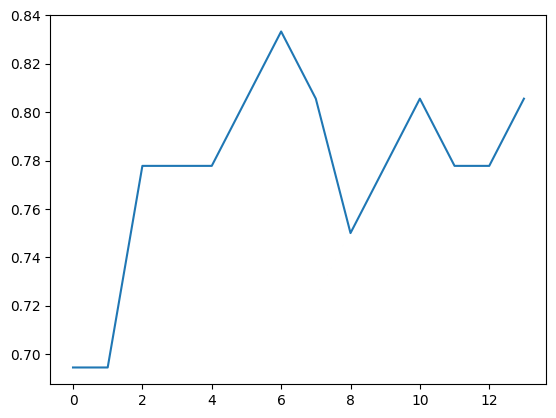

In [42]:
# Create an accuracy table to check which K is the best on the testing set
sns.lineplot(data=accuracy_test)

b-1. Using the optimal k-value, report the accuracy, specificity, sensitivity, and precision rates for the test data set. (Round your answers to 2 decimal places.) Please note that the confusion_matrix function has the 0 and 1 values the other way around compared to our textbook.

In [44]:
# Create predictions using the highest accuracy k-value
knn= KNeighborsClassifier(n_neighbors=7)
#fit into training data
knn.fit(X_trainSS, y_train)

#get scores
knn.score(X_testSS, y_test)

0.8333333333333334

In [48]:
# Create confusion matrix with actual test values and predictions

#predictions
predictions=knn.predict(X_testSS)

confusion_matrix(y_test, predictions)
confusion=confusion_matrix(y_test, predictions)
confusion

array([[ 9,  5],
       [ 1, 21]])

In [49]:
# Calcaulate Confusion Metrics

TN= confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

#Misclassification (error rate)
ErrorRate= (FP + FN) / (TP+TN+FP+FN)
print("Error rate is", np.round(ErrorRate, 2))

#Accuracy 
Accuracy= (TP+TN) / (TP+TN+FP+FN)
print("Accuracy is", np.round(Accuracy, 2))

#True Positive, Sensitivity
Sensitivity= (TP)/ (TP + FN)
print("Sensitivity is", round(Sensitivity, 2))

#Precision
Precision= (TP) / (TP+FP)
print("Precision is", np.round(Precision, 2))

#Specificity 
Specificity= (TN)/(TN+FP)
print("Specificity is", np.round(Specificity, 2))

#False Positive
FalsePositive= (FP) / (TN+FP)
print("False positive is", round(FalsePositive, 2))

Error rate is 0.17
Accuracy is 0.83
Sensitivity is 0.95
Precision is 0.81
Specificity is 0.64
False positive is 0.36
